In [23]:
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
import numpy as np

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
path = '/content/drive/MyDrive/Datasets/mushroom.csv'

In [26]:
# Data was already cleaned
df = pd.read_csv(path)

In [27]:
display(df)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [28]:
# Train/Test Split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1)

In [29]:
#Training
model = CatBoostClassifier(random_state=0, learning_rate = 0.01, max_depth=5,n_estimators=1000)
model.fit(X_train, y_train)

0:	learn: 0.6679195	total: 12.9ms	remaining: 12.8s
1:	learn: 0.6451251	total: 19.8ms	remaining: 9.86s
2:	learn: 0.6261567	total: 32ms	remaining: 10.6s
3:	learn: 0.6033810	total: 37ms	remaining: 9.22s
4:	learn: 0.5837646	total: 43.4ms	remaining: 8.64s
5:	learn: 0.5591268	total: 61.9ms	remaining: 10.3s
6:	learn: 0.5390293	total: 78.5ms	remaining: 11.1s
7:	learn: 0.5193907	total: 87.2ms	remaining: 10.8s
8:	learn: 0.5023708	total: 106ms	remaining: 11.7s
9:	learn: 0.4843025	total: 113ms	remaining: 11.2s
10:	learn: 0.4674102	total: 131ms	remaining: 11.8s
11:	learn: 0.4493995	total: 154ms	remaining: 12.7s
12:	learn: 0.4285237	total: 177ms	remaining: 13.4s
13:	learn: 0.4132938	total: 194ms	remaining: 13.6s
14:	learn: 0.4019476	total: 213ms	remaining: 14s
15:	learn: 0.3880775	total: 233ms	remaining: 14.3s
16:	learn: 0.3745932	total: 251ms	remaining: 14.5s
17:	learn: 0.3626905	total: 270ms	remaining: 14.7s
18:	learn: 0.3520256	total: 283ms	remaining: 14.6s
19:	learn: 0.3391262	total: 295ms	remai

In [30]:
print("Test Accuracy: {}%".format(round(model.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [31]:
y_pred_model = model.predict(X_test)
print("CatBoost Classifier report: \n\n", classification_report(y_test, y_pred_model))

CatBoost Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



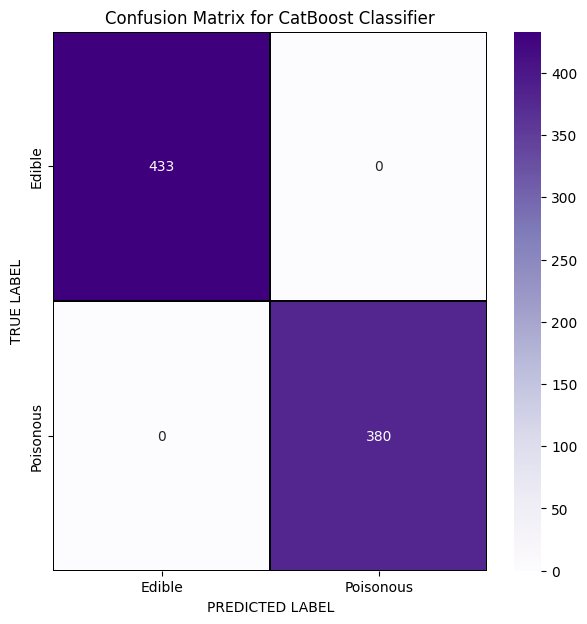

In [32]:
cm = confusion_matrix(y_test, y_pred_model)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for CatBoost Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()